In [2]:
from doppler_imaging import *
import numpy as np
import paths

from config_sim import *

In [3]:
modelmap = "1spot"
nk = 125
nlat, nlon = 10, 20
alpha = 2000
contrast = 0.8
noisetype = "random"

if True:
    # Auto consistent options
    cut = nk - 70
    if map_type == "eqarea":
        use_eqarea = True

    nobs = nobss[target]

    # set chips to include
    goodchips = goodchips_sim[instru][target][band]
    if use_toy_spec:
        goodchips = [4]
    nchip = len(goodchips)

    # set model files to use
    if "t1" in modelspec:
        if instru == "CRIRES": #TODO: put CRIRES data here
            model_datafiles = {"W1049B": 'fainterspectral-fits_6.pickle', "W1049A":'brighterspectral-fits_6.pickle'}
            model_datafile = model_datafiles[target]
        else:
            model_datafile = paths.data / f'{instru}_{target}_{band}_{modelspec}.pickle'
        pmod = f'linbroad_{modelspec}'
        rv = rvs[target]
        if use_toy_spec:
            print("Using toy spectrum...")
            pmod = f'toy_{modelspec}'
            rv = 0

    elif "lte" in modelspec: #TODO: shall I just delete this option
        if instru == "CRIRES":
            model_datafiles = {"W1049B": 'fainterspectral-fits_6.pickle', "W1049A":'brighterspectral-fits_6.pickle'}
            model_datafile = model_datafiles[target]
        else:
            model_datafile = paths.data / f'{instru}_{target}_{band}_{modelspec}.pickle'
        pmod = 'linbroad_lte015'
        rv = rvs[target]

    line_file = paths.data / f'linelists/{pmod}_edited.clineslsd'
    cont_file = paths.data / f'linelists/{pmod}C.fits'

    # set solver parameters
    period = periods[target]
    inc = incs[target]
    vsini = vsinis[target]
    veq = vsini / np.sin(inc * np.pi / 180)

    # set time and period parameters
    timestamp = np.linspace(0, period, nobs)  # simulate equal time interval obs
    phases = timestamp * 2 * np.pi / period # 0 ~ 2*pi in rad
    theta = 360.0 * timestamp / period      # 0 ~ 360 in degree

    assert nobs == len(theta)

    kwargs_sim = dict(
        ydeg=ydeg_sim,
        udeg=udeg,
        nc=nc,
        veq=veq,
        inc=inc,
        nt=nobs,
        vsini_max=vsini_max,
        u1=u1,
        theta=theta)

    kwargs_run = kwargs_sim.copy()
    kwargs_run['ydeg'] = ydeg

    kwargs_IC14 = dict(
        phases=phases, 
        inc=inc, 
        vsini=vsini, 
        LLD=LLD, 
        eqarea=use_eqarea, 
        nlat=nlat, 
        nlon=nlon,
        alpha=alpha,
        ftol=ftol
    )

    kwargs_fig = dict(
        goodchips=goodchips,
        noisetype=noisetype,
        contrast=contrast,
        savedir=savedir
    )


In [4]:
assert simulation_on == True

# Load data from fit pickle
mean_spectrum, template, observed, residual, error, wav_nm, wav0_nm = load_data(model_datafile, instru, nobs, goodchips)

nobs: 14, nchip: 11, npix: 1848
mean_spectrum: (11, 1848)
template: (14, 11, 1848)
observed: (14, 11, 1648)
wav: (11, 1648), wav0: (11, 1848)


/Users/xqchen/workspace/igrins_doppler_imaging/src/scripts/ELL_map_class.py:445: RuntimeWarning: divide by zero encountered in double_scalars
  if visible_corners[1,ii]/newy < 0:


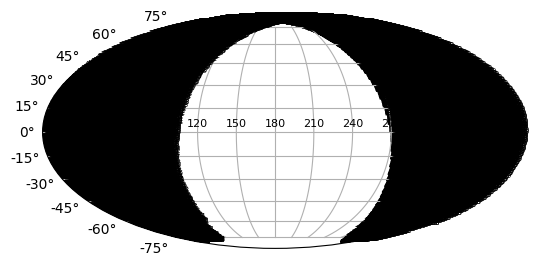

In [67]:
# create a fake map
inc_ = (90 - inc) * np.pi / 180
mmap = ELL_map.map(nlat=180, nlon=360, inc=inc_)
plot_map_cells(mmap)
ncell = mmap.ncell
nx = ncell
flatguess = 100*np.ones(nx)

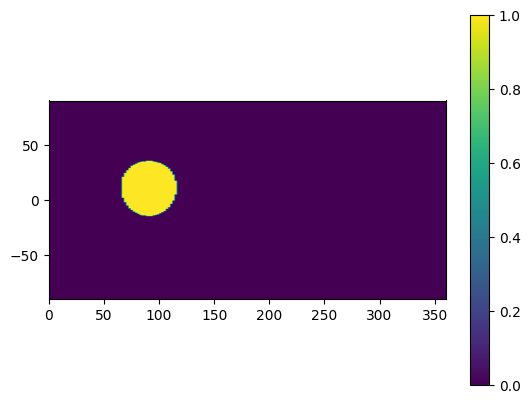

In [76]:
spotlat=10
spotlon=90
spotrad=25
spot_brightness = 0.8
phi, theta = ELL_map.make_latlon_grid(180-1, 360-1)
theta = theta - np.pi/2
spotmap = makespot(spotlat, spotlon, spotrad, phi=phi, theta=theta)
plt.imshow(spotmap, origin="lower", extent=(0, 360, -90, 90))
plt.colorbar()

In [79]:
fakemap = np.ones_like(spotmap, dtype=float)
fakemap[spotmap<0.5] = 100
fakemap[spotmap>0.5] = 100*spot_brightness

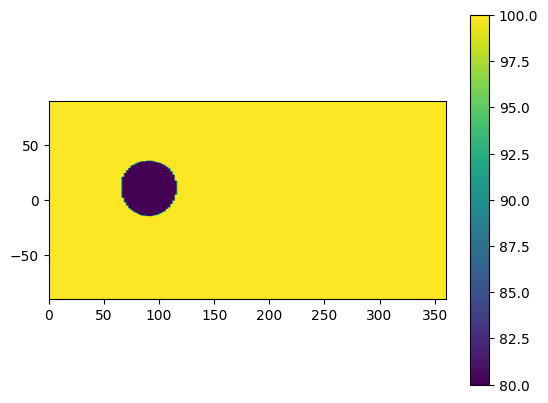

In [80]:
plt.imshow(fakemap, origin="lower", extent=(0, 360, -90, 90))
plt.colorbar()

In [81]:
fakemap.shape

(360, 180)

In [82]:
fakemap_1d = fakemap.flatten()

IGRINS
dbeta 6.718406274438128e-06
chip 0


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


chip 1
chip 2
chip 3
chip 4
chip 5
chip 15
chip 16
chip 17
chip 18
chip 19
chip: 0 obs: 0 offset: 0
modkerns shifted to center.
chip: 0 obs: 1 offset: 0
chip: 0 obs: 2 offset: 1
chip: 0 obs: 3 offset: 0
chip: 0 obs: 4 offset: 0
chip: 0 obs: 5 offset: 0
chip: 0 obs: 6 offset: 0
chip: 0 obs: 7 offset: 0
chip: 0 obs: 8 offset: 0
chip: 0 obs: 9 offset: 0
chip: 0 obs: 10 offset: 0
chip: 0 obs: 11 offset: -1
chip: 0 obs: 12 offset: 0
chip: 0 obs: 13 offset: 0
chip: 1 obs: 0 offset: 0
modkerns shifted to center.
chip: 1 obs: 1 offset: 0
chip: 1 obs: 2 offset: 0
chip: 1 obs: 3 offset: 0
chip: 1 obs: 4 offset: 0
chip: 1 obs: 5 offset: 0
chip: 1 obs: 6 offset: 0
chip: 1 obs: 7 offset: 0
chip: 1 obs: 8 offset: 0
chip: 1 obs: 9 offset: 0
chip: 1 obs: 10 offset: 0
chip: 1 obs: 11 offset: 0
chip: 1 obs: 12 offset: 0
chip: 1 obs: 13 offset: 0
chip: 2 obs: 0 offset: 0
modkerns shifted to center.
chip: 2 obs: 1 offset: 0
chip: 2 obs: 2 offset: 0
chip: 2 obs: 3 offset: 0
chip: 2 obs: 4 offset: 0
chip: 2

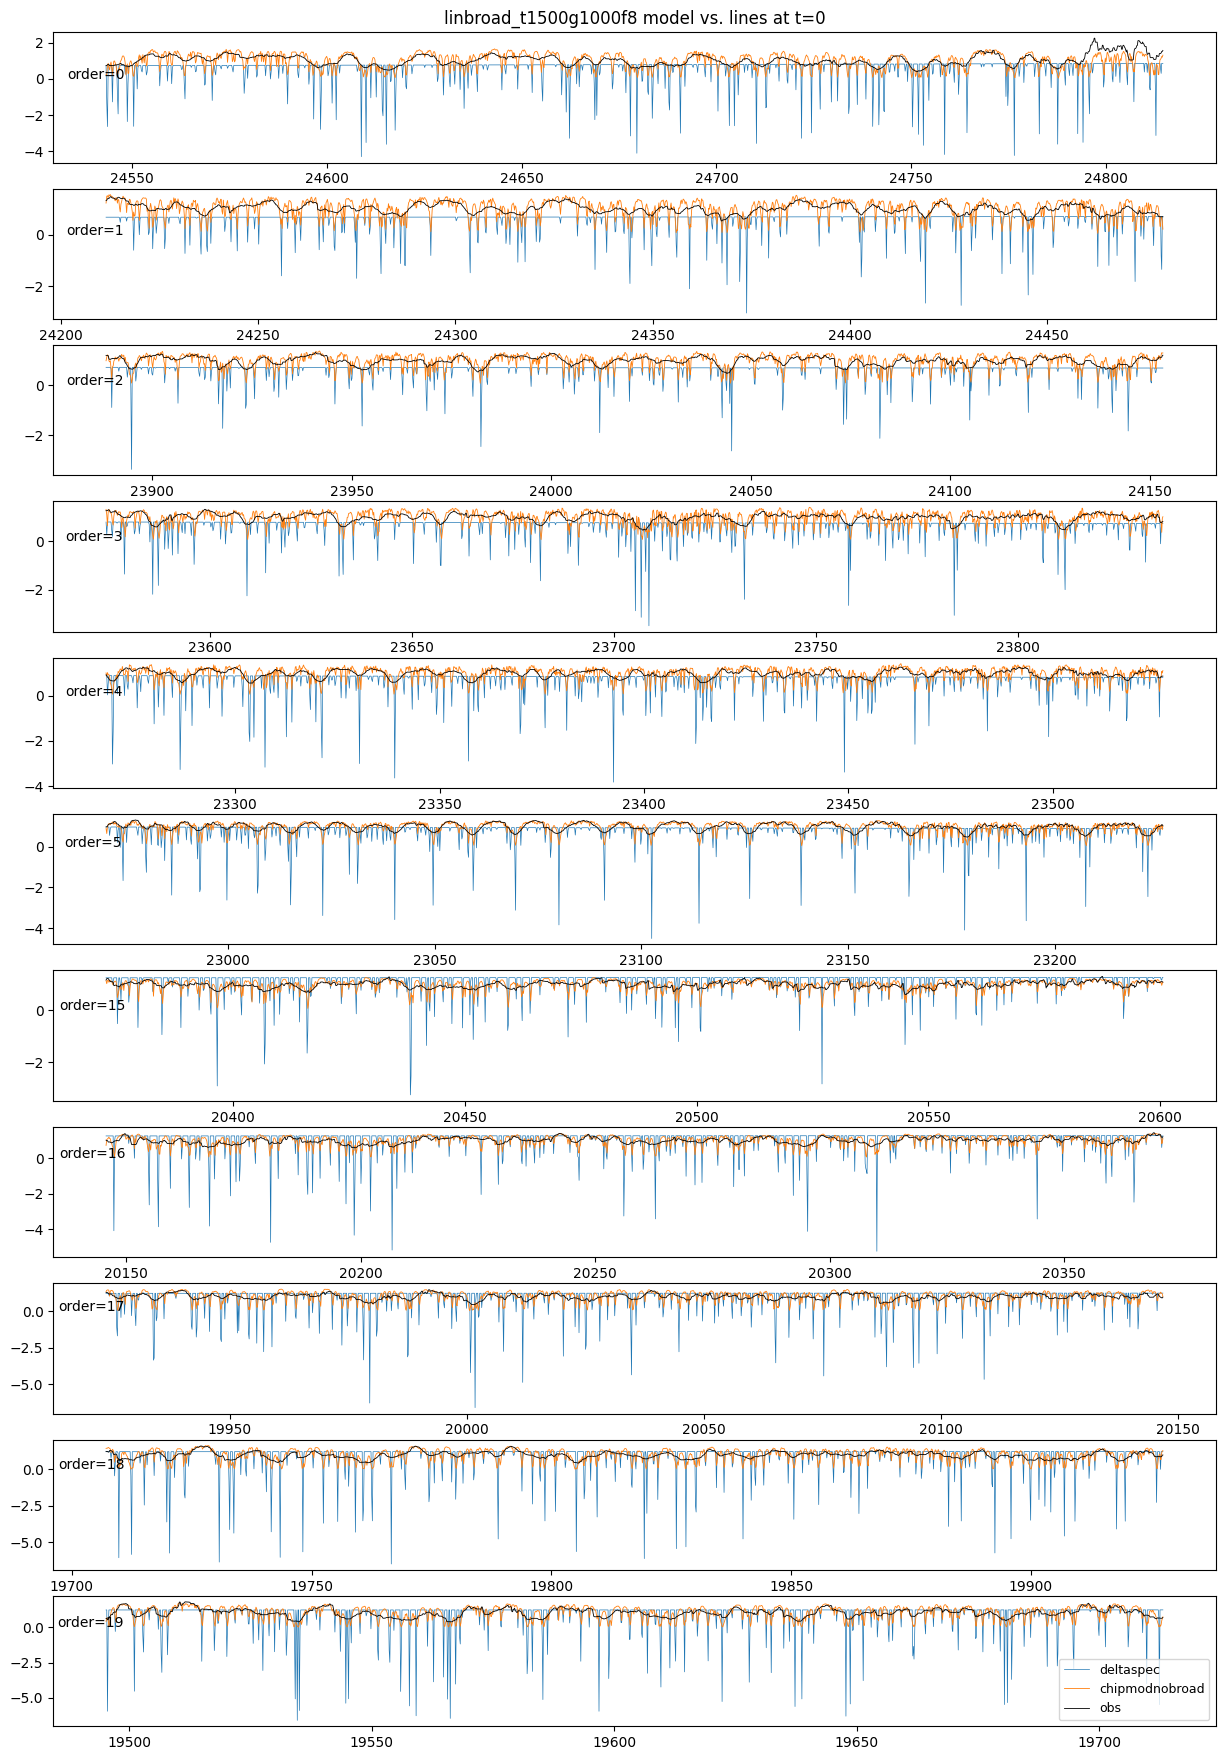

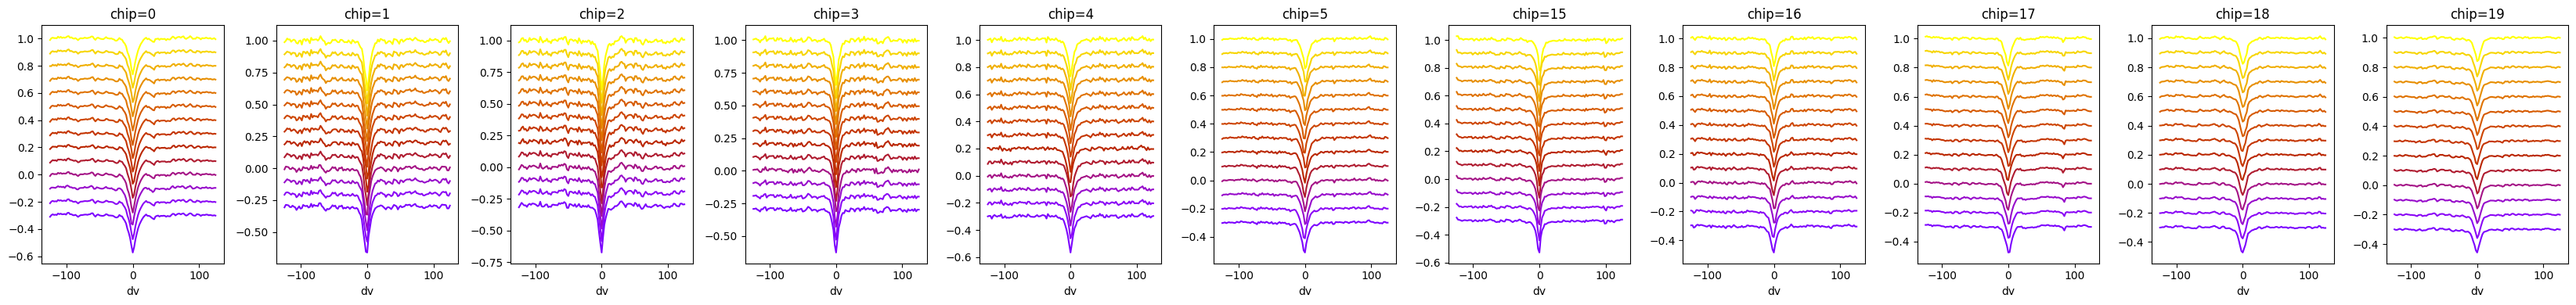

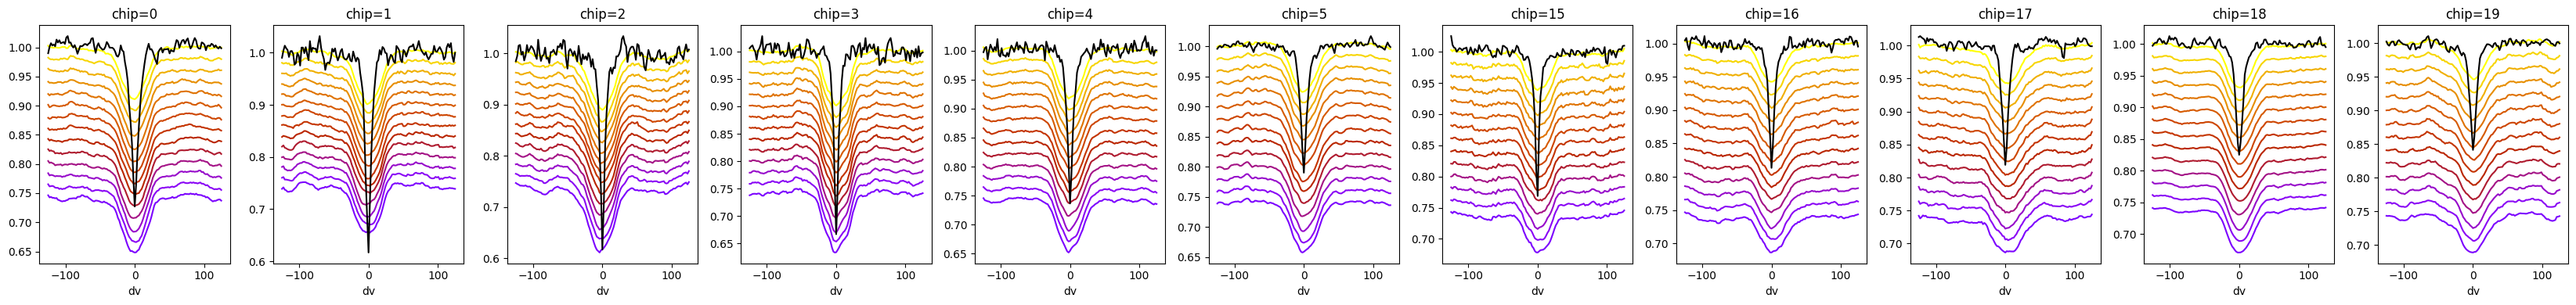

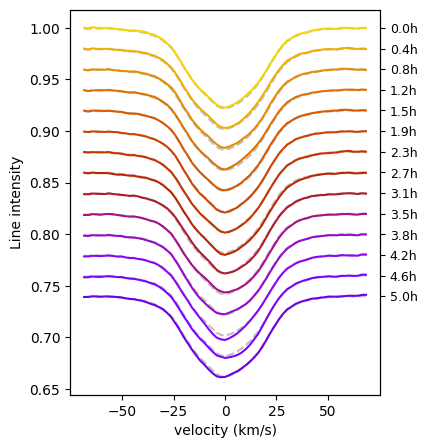

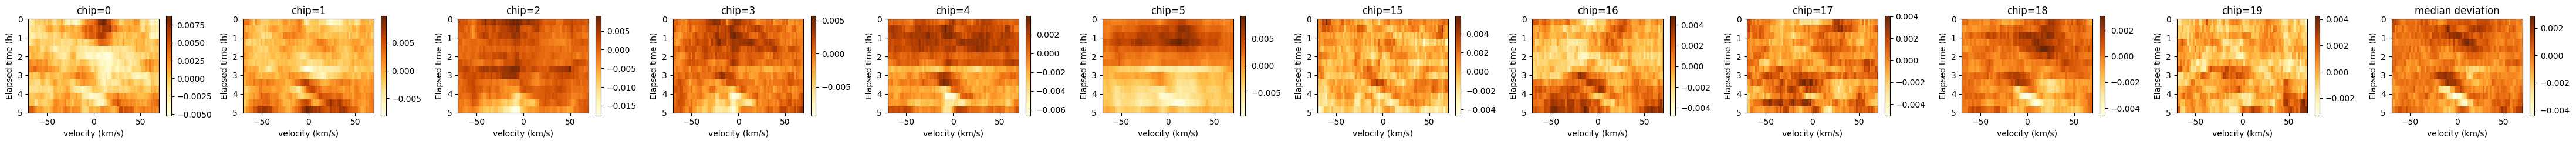

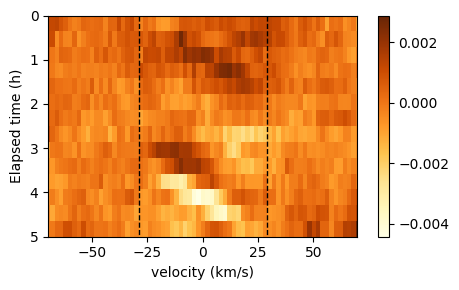

In [62]:
intrinsic_profiles, obskerns_norm = make_LSD_profile(instru, template, observed, wav_nm, goodchips, pmod, line_file, cont_file, nk, vsini, rv, 
                                                     period, timestamp, savedir, cut=cut)

In [64]:
### Prepare data for DIME
dbeta = 6.7184e-06
mean_profile = np.median(intrinsic_profiles, axis=0) # mean over chips
modIP = 1. - np.concatenate((np.zeros(300), mean_profile, np.zeros(300)))
modDV = - np.arange(np.floor(-modIP.size/2.+.5), np.floor(modIP.size/2.+.5)) * dbeta * const.c / 1e3
flineSpline = interpolate.UnivariateSpline(modDV[::-1], modIP[::-1], k=1., s=0.)
dv = -dbeta * np.arange(np.floor(-nk/2.+.5), np.floor(nk/2.+.5)) * const.c / 1e3 # km/s

In [66]:
ncell

200

In [71]:
Rmatrix.shape

(64800, 1750)

In [83]:
fakemap_1d.shape

(64800,)

In [84]:
# Compute R matrix
Rmatrix = np.zeros((ncell, nobs*dv.size), dtype=np.float32)
for kk, rot in enumerate(phases):
    modIP = 1. - np.concatenate((np.zeros(300), mean_profile, np.zeros(300)))
    modDV = - np.arange(np.floor(-modIP.size/2.+.5), np.floor(modIP.size/2.+.5)) * dbeta * const.c / 1e3
    flineSpline = interpolate.UnivariateSpline(modDV[::-1], modIP[::-1], k=1., s=0.)
    speccube = np.zeros((ncell, dv.size), dtype=np.float32) 
    this_map = mmap
    this_doppler = 1. + vsini*this_map.visible_rvcorners.mean(1)/const.c/np.cos(inc_) # mean rv of each cell in m/s
    good = (this_map.projected_area>0) * np.isfinite(this_doppler)
    for ii in good.nonzero()[0]:
        speccube[ii,:] = flineSpline(dv + (this_doppler[ii]-1)*const.c/1000.)
    limbdarkening = (1. - LLD) + LLD * this_map.mu
    Rblock = speccube * ((limbdarkening*this_map.projected_area).reshape(this_map.ncell, 1)*np.pi/this_map.projected_area.sum())
    Rmatrix[:,dv.size*kk:dv.size*(kk+1)] = Rblock

fakemodel = dime.normalize_model(np.dot(fakemap_1d, Rmatrix), nk)
fakemodel_2d = np.reshape(fakemodel, (nobs, nk))

In [86]:
observed.shape

(14, 11, 1648)

In [87]:
fakemodel_2d.shape

(14, 125)

In [88]:
intrinsic_profiles.shape

(11, 125)

In [89]:
obskerns_norm.shape

(14, 11, 125)